In [1]:
import glob
import json
import os
from pathlib import Path
import numpy as np
import pandas as pd
from siuba import group_by, summarize, arrange, filter, mutate, if_else, _
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import torch
from torchvision import transforms
from multimodal.multimodal_lit import MultiModalLitModel
import clip
from sklearn.manifold import TSNE
from PIL import Image

/home/wv9/code/WaiKeen/miniconda3/envs/multimodal-baby/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/wv9/code/WaiKeen/miniconda3/envs/multimodal-baby/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


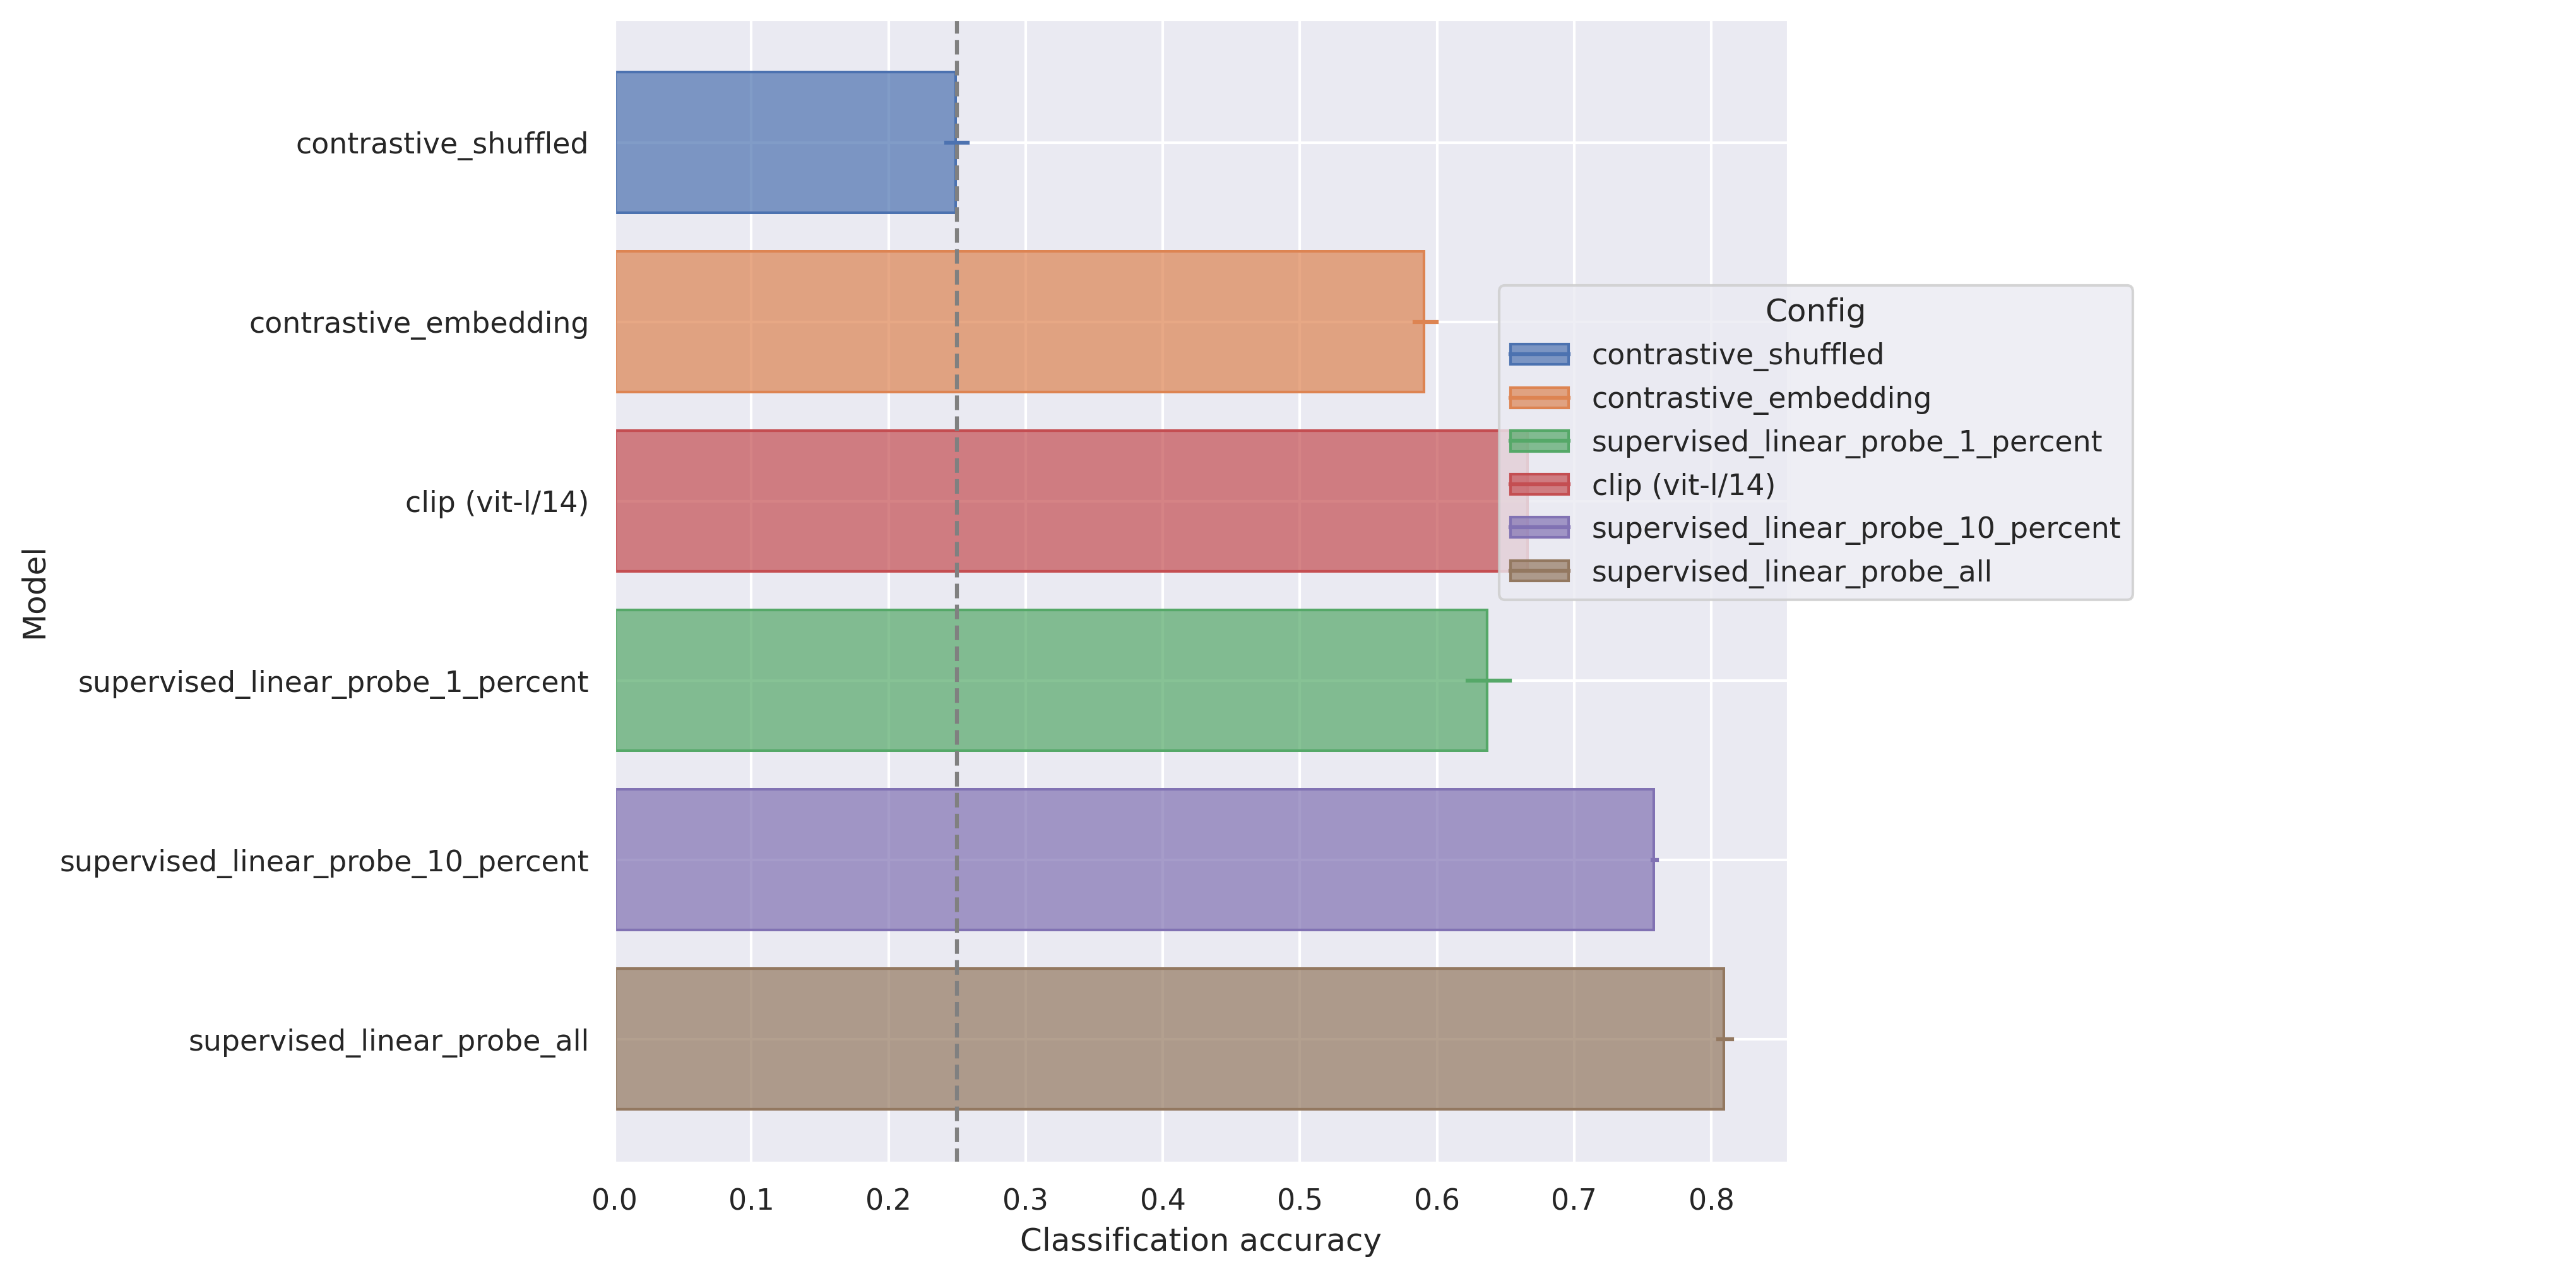

In [8]:
# saycam labeled s results plot
embedding_results = ["../results/embedding_frozen_pretrained_seed_0_image_saycam_test_eval_predictions.json",
"../results/embedding_frozen_pretrained_seed_1_image_saycam_test_eval_predictions.json",
"../results/embedding_frozen_pretrained_seed_2_image_saycam_test_eval_predictions.json"]
shuffled_results = ["../results/shuffle_embedding_frozen_pretrained_seed_0_image_saycam_test_eval_predictions.json",
"../results/shuffle_embedding_frozen_pretrained_seed_1_image_saycam_test_eval_predictions.json",
"../results/shuffle_embedding_frozen_pretrained_seed_2_image_saycam_test_eval_predictions.json"]
frozen_linear_probe_all_results = ["../results/embedding_linear_probe_frozen_pretrained_seed_0_image_saycam_eval_predictions.json",
"../results/embedding_linear_probe_frozen_pretrained_seed_1_image_saycam_eval_predictions.json",
"../results/embedding_linear_probe_frozen_pretrained_seed_2_image_saycam_eval_predictions.json"]
frozen_linear_probe_1_percent_results = ["../results/embedding_linear_probe_1_percent_frozen_pretrained_seed_0_image_saycam_eval_predictions.json",
"../results/embedding_linear_probe_1_percent_frozen_pretrained_seed_1_image_saycam_eval_predictions.json",
"../results/embedding_linear_probe_1_percent_frozen_pretrained_seed_2_image_saycam_eval_predictions.json"]
frozen_linear_probe_10_percent_results = ["../results/embedding_linear_probe_10_percent_frozen_pretrained_seed_0_image_saycam_eval_predictions.json",
"../results/embedding_linear_probe_10_percent_frozen_pretrained_seed_1_image_saycam_eval_predictions.json",
"../results/embedding_linear_probe_10_percent_frozen_pretrained_seed_2_image_saycam_eval_predictions.json"]
clip_results = ["../results/clip_image_saycam_test_eval_predictions.json"]

saycam_results = []

for results in embedding_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "contrastive_embedding"
    saycam_results.append(result_df)
    
for results in shuffled_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "contrastive_shuffled"
    saycam_results.append(result_df)
    
for results in frozen_linear_probe_all_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "supervised_linear_probe_all"
    saycam_results.append(result_df)
    
for results in frozen_linear_probe_1_percent_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "supervised_linear_probe_1_percent"
    saycam_results.append(result_df)
    
for results in frozen_linear_probe_10_percent_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "supervised_linear_probe_10_percent"
    saycam_results.append(result_df)
    
for results in clip_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "clip (vit-l/14)"
    result_df["seed"] = 0
    saycam_results.append(result_df)
    
# combine results
saycam_results_df = pd.concat(saycam_results)

# summary figure
saycam_summary = (saycam_results_df
>> group_by(_.config, _.seed)
>> summarize(correct = _.correct.mean())
>> arrange(_.correct))

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(8, 8))

(
    so.Plot(saycam_summary, x="correct", y="config", color="config")
    .add(so.Bar(), so.Agg())
    .add(so.Range(), so.Est(errorbar="se"))
    .label(
        x="Text encoder", y="Classification accuracy",
        color=str.capitalize)
    .scale(y=so.Nominal(order=['contrastive_shuffled', 'contrastive_embedding', 'clip (vit-l/14)', 
                               'supervised_linear_probe_1_percent', 'supervised_linear_probe_10_percent', 'supervised_linear_probe_all'][::-1]))
    .label(x="Classification accuracy", y="Model")
    .on(fig)
    .plot()
    #.save('../paper/figures/labeled-s-results.pdf', dpi=300, bbox_inches="tight")
)

ax = plt.gca()
ax.axvline(0.25, linestyle='--', color='grey')

/home/wv9/code/WaiKeen/miniconda3/envs/multimodal-baby/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/home/wv9/code/WaiKeen/miniconda3/envs/multimodal-baby/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


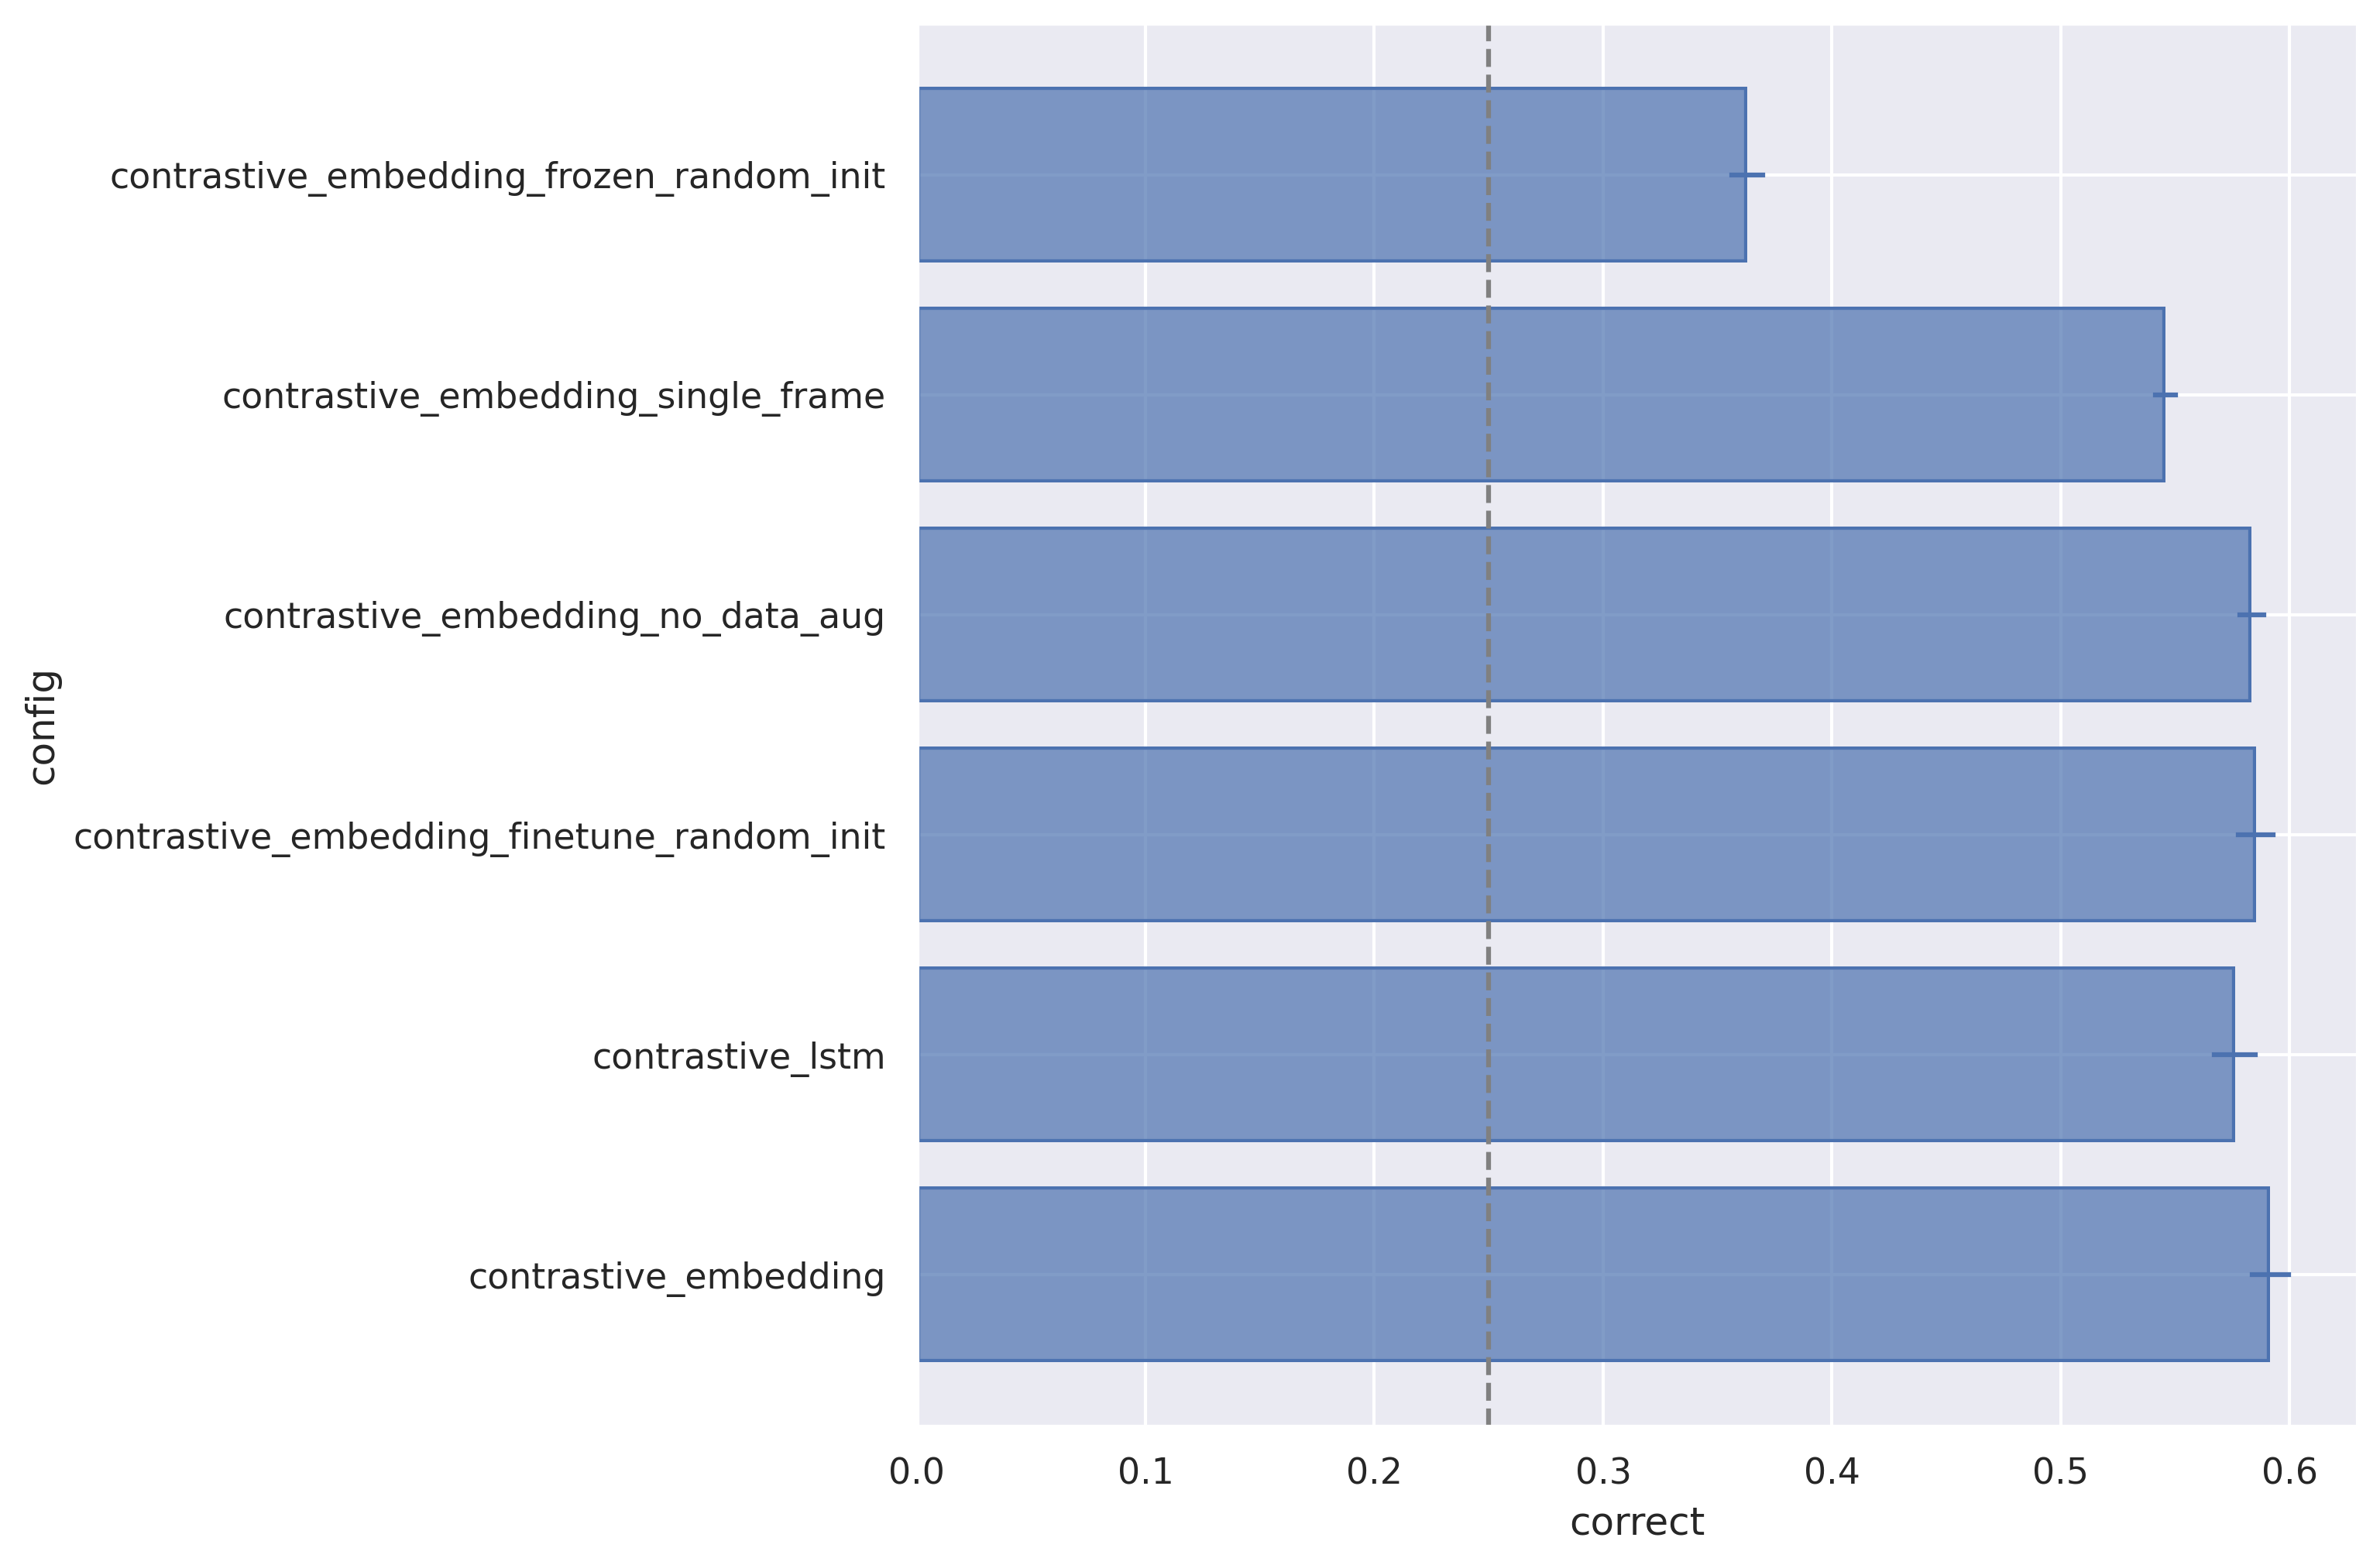

In [44]:
saycam_ablations = []
embedding_results = ["../results/embedding_frozen_pretrained_seed_0_image_saycam_test_eval_predictions.json",
"../results/embedding_frozen_pretrained_seed_1_image_saycam_test_eval_predictions.json",
"../results/embedding_frozen_pretrained_seed_2_image_saycam_test_eval_predictions.json"]
lstm_results = ["../results/lstm_frozen_pretrained_seed_0_image_saycam_test_eval_predictions.json",
"../results/lstm_frozen_pretrained_seed_1_image_saycam_test_eval_predictions.json",
"../results/lstm_frozen_pretrained_seed_2_image_saycam_test_eval_predictions.json"]
embedding_finetune_random_init_results = ["../results/embedding_finetune_random_init_seed_0_image_saycam_test_eval_predictions.json", 
"../results/embedding_finetune_random_init_seed_1_image_saycam_test_eval_predictions.json",
"../results/embedding_finetune_random_init_seed_2_image_saycam_test_eval_predictions.json"]
embedding_frozen_random_init_results = ["../results/embedding_frozen_random_init_seed_0_image_saycam_test_eval_predictions.json", 
"../results/embedding_frozen_random_init_seed_1_image_saycam_test_eval_predictions.json",
"../results/embedding_frozen_random_init_seed_2_image_saycam_test_eval_predictions.json"]
single_frame_results = ["../results/embedding_frozen_pretrained_multiple_frames_False_seed_0_image_saycam_test_eval_predictions.json",
"../results/embedding_frozen_pretrained_multiple_frames_False_seed_1_image_saycam_test_eval_predictions.json",
"../results/embedding_frozen_pretrained_multiple_frames_False_seed_2_image_saycam_test_eval_predictions.json"]
no_data_aug_results = ["../results/embedding_frozen_pretrained_augment_frames_False_seed_0_image_saycam_test_eval_predictions.json",
"../results/embedding_frozen_pretrained_augment_frames_False_seed_1_image_saycam_test_eval_predictions.json",
"../results/embedding_frozen_pretrained_augment_frames_False_seed_2_image_saycam_test_eval_predictions.json"]

for results in embedding_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "contrastive_embedding"
    saycam_ablations.append(result_df)

for results in lstm_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "contrastive_lstm"
    saycam_ablations.append(result_df)
    
for results in embedding_finetune_random_init_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "contrastive_embedding_finetune_random_init"
    saycam_ablations.append(result_df)

for results in embedding_frozen_random_init_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "contrastive_embedding_frozen_random_init"
    saycam_ablations.append(result_df)
    
for results in single_frame_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "contrastive_embedding_single_frame"
    saycam_ablations.append(result_df)
    
for results in no_data_aug_results:
    with open(results) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    result_df["target_category"] = result_df["categories"].str[0]
    
    # add extra columns
    result_df["config"] = "contrastive_embedding_no_data_aug"
    saycam_ablations.append(result_df)
    
# import matplotlib as mpl
saycam_ablations = pd.concat(saycam_ablations)
saycam_ablations_summary = (saycam_ablations
>> group_by(_.config, _.seed)
>> summarize(correct = _.correct.mean()))

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(8, 8))

(
    so.Plot(saycam_ablations_summary, x="correct", y="config")
    .add(so.Bar(), so.Agg())
    .add(so.Range(), so.Est(errorbar="se"))
    .scale(y=so.Nominal(order=['contrastive_embedding_frozen_random_init', 'contrastive_embedding_single_frame', 'contrastive_embedding_no_data_aug', 'contrastive_embedding_finetune_random_init', 'contrastive_lstm', 'contrastive_embedding'][::-1]))
    .on(fig)
    .plot()
    # .label(x="Classification accuracy", y="Model")
    #.save('../paper/figures/labeled-s-results.pdf', dpi=300, bbox_inches="tight")
)

ax = plt.gca()
ax.axvline(0.25, linestyle='--', color='grey')
# plt.legend([], [], frameon=False)
# ax.get_legend().remove()
# plt.gca().legend([], [], frameon=False).set_visible(False)

In [ ]:
# saycam per object category results
saycam_pretrained_frozen_embedding_results = (saycam_results_df
>> filter(_.config != "contrastive_lstm", _.config != "contrastive_single_frame")                                              
>> group_by(_.config, _.target_category, _.seed)
>> summarize(correct = _.correct.mean()))


(
    so.Plot(saycam_pretrained_frozen_embedding_results, x="correct", y="config", color="config")
    .facet("target_category", wrap=5)
    .add(so.Bar(), so.Agg())
    .add(so.Range(), so.Est(errorbar="se"))
    .scale(y=so.Nominal(order=['contrastive_shuffled', 'contrastive_embedding', 'clip (vit-l/14)', 'supervised_linear_probe'][::-1]))
    .layout(size=(15, 12))
    #.save('../paper/figures/labeled-s-results-by-category.pdf', dpi=300, bbox_inches="tight")
)

In [ ]:
# brady object categories results
brady_results_filenames = glob.glob("../results/*object_categories*.json")
print(len(brady_results_filenames))

brady_results = []
for filename in brady_results_filenames:
    with open(filename) as f:
        data = json.load(f)

    result_df = pd.DataFrame(data["data"])
    # print(result_df.columns)
    result_df["target_category"] = result_df["categories"].str[0]
    brady_results.append(result_df)

# combine results
brady_results_df = pd.concat(brady_results)

# calculate summary
brady_summary_diff_init = (brady_results_df
>> filter(_.shuffle_utterances == False, _.eval_type == "image", _.cnn == "frozen_pretrained")
>> group_by(_.cnn, _.model, _.seed)
>> summarize(correct = _.correct.mean()))

In [ ]:
# brady per object category results
from itertools import chain
brady_pretrained_frozen_embedding_results = (brady_results_df
>> filter(_.shuffle_utterances == False, _.cnn == "frozen_pretrained", _.model == "embedding", _.eval_type =="image")
>> group_by(_.target_category, _.seed)
>> summarize(correct = _.correct.mean())
>> arrange(_.correct)
>> mutate(row=list(chain(*[[i]*96 for i in range(2)]))))


(
    so.Plot((brady_pretrained_frozen_embedding_results), x="correct", y="target_category")
    # .facet(col="target_category", wrap=8)
    .add(so.Dot(), so.Agg())
    .add(so.Range(), so.Est(errorbar="se"))
    .layout(size=(6, 14))
)

In [ ]:
# try plotting as a line graph instead



In [ ]:
# visualize embeddings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
normalizer = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

preprocess = transforms.Compose([
            transforms.Resize((224, 224),
                              interpolation=transforms.InterpolationMode.BICUBIC),
            transforms.ToTensor(),
            normalizer,
        ])

# load embedding checkpoint
checkpoint_name = f"multimodal_text_encoder_embedding_embedding_dim_512_batch_size_8_dropout_i_0.5_lr_0.0001_lr_scheduler_True_weight_decay_0.1_max_epochs_400_seed_0"
checkpoint = glob.glob(f"/home/wv9/code/WaiKeen/multimodal-baby/checkpoints/{checkpoint_name}/epoch*.ckpt")[0]
model = MultiModalLitModel.load_from_checkpoint(checkpoint, map_location=device)
model.eval()
print("")

In [ ]:
# get image embeddings
DATA_DIR = Path("/misc/vlgscratch4/LakeGroup/shared_data/S_multimodal")
EVALUATION_FRAMES_DIR = DATA_DIR / "eval_filtered" / "test"
eval_categories = sorted(os.listdir(EVALUATION_FRAMES_DIR))

all_image_features = []
all_eval_categories = []
all_image_filenames = []

for eval_category in eval_categories:
    frames = sorted(glob.glob(os.path.join(EVALUATION_FRAMES_DIR, eval_category, "*.jpeg")))
    print(eval_category, len(frames))
    # frames = np.random.choice(frames, size=min(len(frames), 200))
    
    for frame in frames:
        I = preprocess(Image.open(frame).convert('RGB')).unsqueeze(0).to(device)
        image_features, _ = model.model.encode_image(I)
        all_image_features.append(image_features.squeeze().detach().cpu().numpy())
        all_eval_categories.append(eval_category)
        all_image_filenames.append(frame)

In [ ]:
VOCAB_FILENAME = DATA_DIR / "vocab.json"
with open(VOCAB_FILENAME) as f:
    vocab = json.load(f)
    
all_text_features = []

for eval_category in eval_categories:
    text = torch.tensor([vocab[eval_category]]).unsqueeze(0).to(device)
    text_len = torch.tensor([len(text)], dtype=torch.long).to(device)
    text_features, _ = model.model.encode_text(text, text_len)
    all_text_features.append(text_features.squeeze().detach().cpu().numpy())

In [ ]:
# get mean image embeddings
all_image_features = np.array(all_image_features)
mean_image_features = []
for i in range(len(eval_categories)):
    idxs = [j for j in range(len(all_eval_categories)) if all_eval_categories[j] == eval_categories[i]]
    curr_image_features = all_image_features[idxs]
    curr_mean_image_features = np.mean(curr_image_features, axis=0)
    mean_image_features.append(curr_mean_image_features)
    
mean_image_features = np.array(mean_image_features)
print(all_image_features.shape)
print(mean_image_features.shape)

In [ ]:
# plot image embeddings
# n_components = 2
# tsne = TSNE(n_components, perplexity=2)
# all_mean_image_features = np.concatenate([all_image_features, mean_image_features])
# tsne_result = tsne.fit_transform(all_mean_image_features)
# all_tsne_result = tsne_result[:-22]
# mean_tsne_result = tsne_result[-22:]
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': all_tsne_result[:,0], 'tsne_2': all_tsne_result[:,1], 'label': all_eval_categories})
mean_tsne_result_df = pd.DataFrame({'tsne_1': mean_tsne_result[:,0], 'tsne_2': mean_tsne_result[:,1], 'label': eval_categories})
fig = plt.figure(figsize=(20, 20))

ax = plt.gca()
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, s=100, legend="auto", palette="Paired", linewidth=0, alpha=0.8)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=mean_tsne_result_df, s=200, legend=False, palette="Paired")
lim = (tsne_result.min()-5, tsne_result.max()+5)
for i, eval_category in enumerate(eval_categories):
    ax.text(mean_tsne_result[i, 0], mean_tsne_result[i, 1], eval_category, size=14)

In [ ]:
# plot text embeddings
n_components = 2
tsne = TSNE(n_components, perplexity=5)
tsne_result = tsne.fit_transform(all_text_features)
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': eval_categories})
fig = plt.figure(figsize=(20, 20))

ax = plt.gca()
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, s=200, legend=False, palette="Paired")
lim = (tsne_result.min()-5, tsne_result.max()+5)
for i, eval_category in enumerate(eval_categories):
    ax.text(tsne_result[i, 0], tsne_result[i, 1], eval_category, size=32)

In [ ]:
# recompute all image features
all_image_features = []
all_eval_categories = []

for eval_category in eval_categories:
    frames = sorted(glob.glob(os.path.join(EVALUATION_FRAMES_DIR, eval_category, "*.jpeg")))
    
    for frame in frames:
        I = preprocess(Image.open(frame).convert('RGB')).unsqueeze(0).to(device)
        image_features, _ = model.model.encode_image(I)
        all_image_features.append(image_features.squeeze().detach().cpu().numpy())
        all_eval_categories.append(eval_category)

In [ ]:
n_components = 2
tsne = TSNE(n_components, perplexity=1.5)
all_mean_image_features = np.concatenate([all_image_features, mean_image_features])
tsne_result = tsne.fit_transform(all_mean_image_features)
all_tsne_result = tsne_result[:-22]
mean_tsne_result = tsne_result[-22:]

In [ ]:
plt.figure(figsize=(15, 15))
ax = plt.gca()
curr_category = "foot"
category_idx = eval_categories.index(curr_category)
sims = []
for image_feature in all_image_features:
    sim = np.power(np.dot(image_feature, all_text_features[category_idx]) / (np.linalg.norm(image_feature)*np.linalg.norm(all_text_features[category_idx])), 2)
    sims.append(sim)

sims = np.array(sims)
sims = (sims - np.min(sims))/np.ptp(sims)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
mean_tsne_result_df = pd.DataFrame({'tsne_1': mean_tsne_result[:,0], 'tsne_2': mean_tsne_result[:,1], 'label': eval_categories})

ax.set_title(curr_category)
# ax = plt.gca()
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, s=50, color='blue', legend='full', alpha=sims, linewidth=0)
lim = (tsne_result.min()-5, tsne_result.max()+5)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=mean_tsne_result_df, s=200, legend=False, palette="Paired", linewidth=0)
for i, eval_category in enumerate(eval_categories):
    ax.text(mean_tsne_result[i, 0], mean_tsne_result[i, 1], eval_category, size=14)

In [ ]:
fig = plt.figure(figsize=(50, 40))
for i, curr_category in enumerate(eval_categories):
    category_idx = eval_categories.index(curr_category)
    sims = []
    for image_feature in all_image_features:
        sim = np.power(np.dot(image_feature, all_text_features[category_idx]) / (np.linalg.norm(image_feature)*np.linalg.norm(all_text_features[category_idx])), 2)
        sims.append(sim)

    sims = np.array(sims)
    sims = (sims - np.min(sims))/np.ptp(sims)

    tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
    mean_tsne_result_df = pd.DataFrame({'tsne_1': mean_tsne_result[:,0], 'tsne_2': mean_tsne_result[:,1], 'label': eval_categories})

    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title(curr_category)
    # ax = plt.gca()
    sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, s=25, color='blue', legend='full', alpha=sims)
    lim = (tsne_result.min()-5, tsne_result.max()+5)
    sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=mean_tsne_result_df, s=50, legend=False, palette="Paired")
    for j, eval_category in enumerate(eval_categories):
        ax.text(mean_tsne_result[j, 0], mean_tsne_result[j, 1], eval_category, size=12)

In [ ]:
# extract image embeddings prior to linear projection layer
import torch.nn as nn
self_sup_model = torch.nn.Sequential(*(list(model.vision_encoder.model.children())[:-1]))
x = torch.randn(1, 3, 224, 224).to(device)
y = self_sup_model(x)

# # get image embeddings
DATA_DIR = Path("/misc/vlgscratch4/LakeGroup/shared_data/S_multimodal")
EVALUATION_FRAMES_DIR = DATA_DIR / "eval_filtered" / "test"
eval_categories = sorted(os.listdir(EVALUATION_FRAMES_DIR))

all_image_features = []
all_eval_categories = []
all_image_filenames = []

for eval_category in eval_categories:
    frames = sorted(glob.glob(os.path.join(EVALUATION_FRAMES_DIR, eval_category, "*.jpeg")))
    print(eval_category, len(frames))
    # frames = np.random.choice(frames, size=min(len(frames), 200))
    
    for frame in frames:
        I = preprocess(Image.open(frame).convert('RGB')).unsqueeze(0).to(device)
        image_features = self_sup_model(I).squeeze()
        all_image_features.append(image_features.squeeze().detach().cpu().numpy())
        all_eval_categories.append(eval_category)
        all_image_filenames.append(frame)

In [ ]:
# get mean image embeddings
all_image_features = np.array(all_image_features)
mean_image_features = []
for i in range(len(eval_categories)):
    idxs = [j for j in range(len(all_eval_categories)) if all_eval_categories[j] == eval_categories[i]]
    curr_image_features = all_image_features[idxs]
    curr_mean_image_features = np.mean(curr_image_features, axis=0)
    mean_image_features.append(curr_mean_image_features)
    
mean_image_features = np.array(mean_image_features)

n_components = 2
tsne = TSNE(n_components, perplexity=2)
all_mean_image_features = np.concatenate([all_image_features, mean_image_features])
tsne_result = tsne.fit_transform(all_mean_image_features)
all_tsne_result = tsne_result[:-22]
mean_tsne_result = tsne_result[-22:]
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': all_tsne_result[:,0], 'tsne_2': all_tsne_result[:,1], 'label': all_eval_categories})
mean_tsne_result_df = pd.DataFrame({'tsne_1': mean_tsne_result[:,0], 'tsne_2': mean_tsne_result[:,1], 'label': eval_categories})
fig = plt.figure(figsize=(20, 20))

ax = plt.gca()
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, s=100, legend="auto", palette="Paired", linewidth=0, alpha=0.8)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=mean_tsne_result_df, s=200, legend=False, palette="Paired")
lim = (tsne_result.min()-5, tsne_result.max()+5)
for i, eval_category in enumerate(eval_categories):
    ax.text(mean_tsne_result[i, 0], mean_tsne_result[i, 1], eval_category, size=14)